# Analyis of Current Data set

In [2]:
import pandas as pd
import pandas_market_calendars as mcal

In [3]:
df = pd.read_csv('data.csv')


df.head()
df.tail()

,timestamp,open,high,low,close,volume,trade_count,vwap,log_price,return
244941,2024-12-31 21:31:00+00:00,75.47,75.47,75.47,75.47,400.0,2.0,75.47,4.323735,0.000530
244942,2024-12-31 21:35:00+00:00,75.53,75.53,75.53,75.53,159.0,2.0,75.53,4.324530,0.000795
244943,2024-12-31 21:36:00+00:00,75.52,75.52,75.52,75.52,437.0,2.0,75.52,4.324398,-0.000132
244944,2024-12-31 21:45:00+00:00,75.51,75.51,75.51,75.51,304.0,2.0,75.51,4.324265,-0.000132
244945,2024-12-31 23:51:00+00:00,75.77,75.77,75.77,75.77,200.0,1.0,75.77,4.327702,0.003437


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244946 entries, 0 to 244945
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   timestamp    244946 non-null  object 
 1   open         244946 non-null  float64
 2   high         244946 non-null  float64
 3   low          244946 non-null  float64
 4   close        244946 non-null  float64
 5   volume       244946 non-null  float64
 6   trade_count  244946 non-null  float64
 7   vwap         244946 non-null  float64
 8   log_price    244946 non-null  float64
 9   return       244946 non-null  float64
dtypes: float64(9), object(1)
memory usage: 18.7+ MB


we have a whole year(2023) of minute level data at all hours (trading and overnight) of the United States Oil Fund (USO), exchange traded fund (ETF) that attempts to track the price of West Texas Intermediate (WTI) Light Sweet Crude Oil. (https://www.uscfinvestments.com/uso)

Data Description:

Timestamp --> Year-Month-Day Hour:Min:Second Timestamp
    * we change this to only go up to the minute as second and timestamp  are always 0
    NOTE THAT USO ETF CAN ONLY BE PURCHASED ON NYSE ARCA 

Open --> The first traded price at the start of the min interval
High --> Hight price reached during the min
Low --> Lowest price traded within the minute
Close --> Final price at the end of min
Volume --> Total num of shares traded durin that minute
trade_count --> number of individual trades executed in that minute
vwap --> volume weighted avg price, avg execution price weighted by trade size

log_price --> natural log of close price
return --> log return between consecutive mins

In [5]:
df["timestamp"] = pd.to_datetime(df["timestamp"])

df["timestamp"] = df["timestamp"].dt.tz_convert("America/New_York")

# Create NYSE trading calendar
nyse = mcal.get_calendar("NYSE")
df = df.set_index("timestamp")
# Generate valid trading days in your date range
schedule = nyse.schedule(start_date=df.index.min().date(), end_date=df.index.max().date())

# Get the list of valid trading days
valid_days = schedule.index.tz_localize("America/New_York")

df = df[df.index.normalize().isin(valid_days)]

# Step 7: filter for trading hours
df = df.between_time("09:30", "16:00")



df.head()

,open,high,low,close,volume,trade_count,vwap,log_price,return
timestamp,,,,,,,,,
2023-01-03 09:30:00-05:00,68.64,68.6800,68.46,68.510,29663.0,476.0,68.589962,4.226980,-0.002624
2023-01-03 09:31:00-05:00,68.56,68.5600,68.45,68.525,8419.0,77.0,68.505704,4.227199,0.000219
2023-01-03 09:32:00-05:00,68.50,68.5450,68.48,68.500,12251.0,124.0,68.505333,4.226834,-0.000365
2023-01-03 09:33:00-05:00,68.49,68.5507,68.34,68.550,56927.0,319.0,68.429161,4.227563,0.000730
2023-01-03 09:34:00-05:00,68.56,68.8430,68.56,68.780,14085.0,124.0,68.685479,4.230913,0.003350


In [6]:
print(df.index.min(), df.index.max())


df.head()

df.to_csv("data1.csv")

2023-01-03 09:30:00-05:00 2024-12-31 16:00:00-05:00


In [7]:
df.shape[0] / (6.5*60)

497.01794871794874

after filtering for trading hours, holidays and weekends on the NYSE we have 250 trading days with 1 minute stamps for all of 2023

<Axes: >

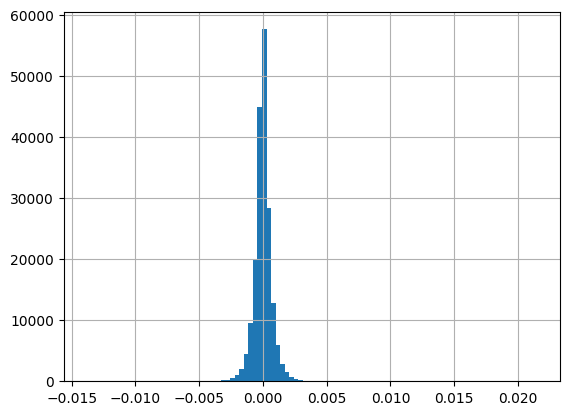

In [8]:
df['return'].hist(bins=100)

<Figure size 10000x600 with 0 Axes>

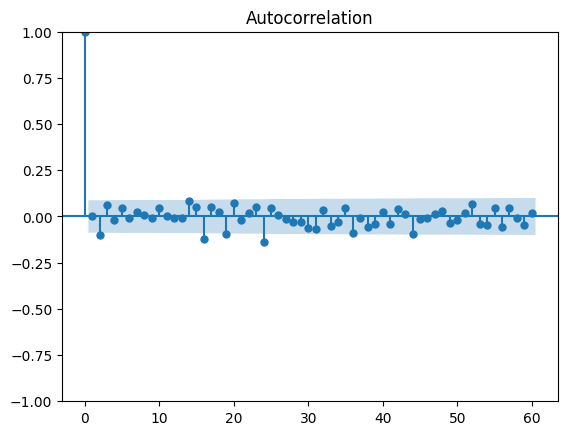

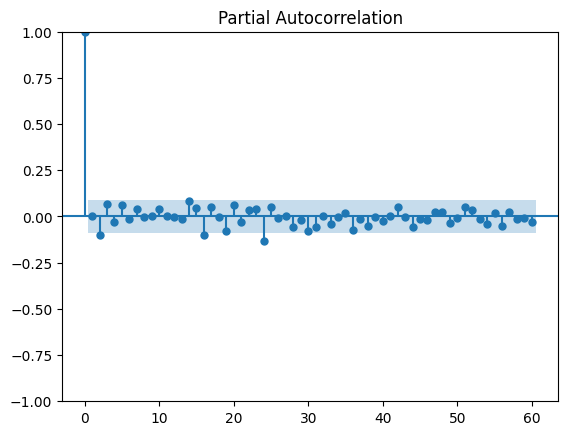

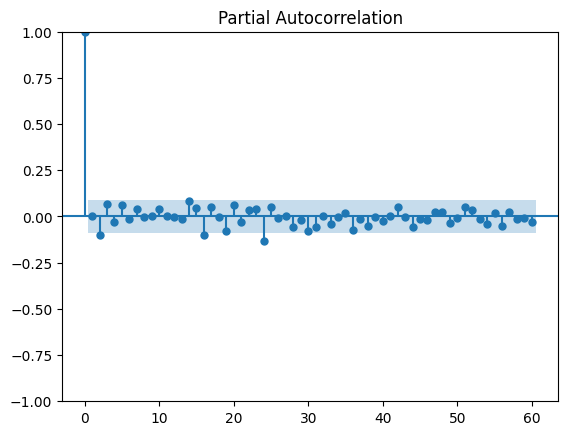

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

visual_df = df[:100]




plt.figure(figsize=(100,6))
plot_acf(df['return'][:500], lags=60)
plt.show()
plot_pacf(df['return'][:500], lags=60)

INTRADAY PRICE PLOT

<Axes: title={'center': 'USO Intraday Prices'}, xlabel='timestamp'>

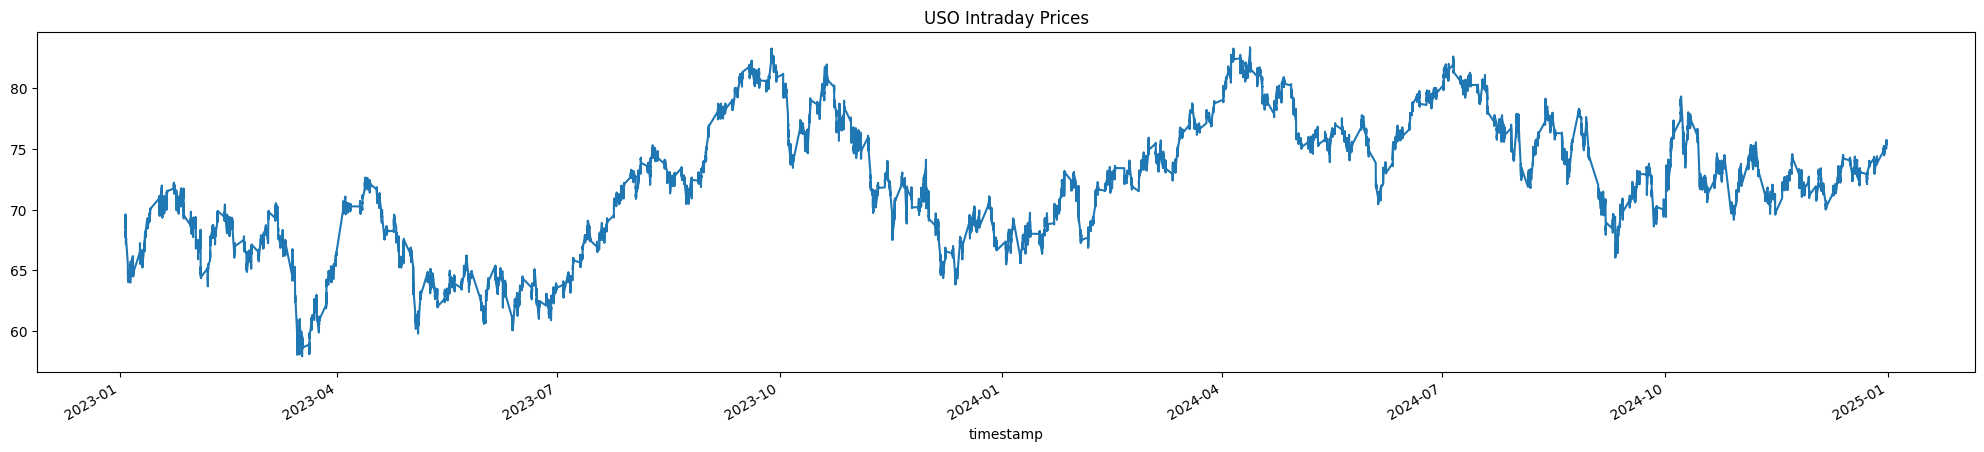

In [10]:
df['close'].plot(title='USO Intraday Prices', figsize=(25,5))

AVERAGE INTRADAY PATTERN (BY MINUTE/HOUR)

<Axes: title={'center': 'Average Price by Hour'}, xlabel='hour'>

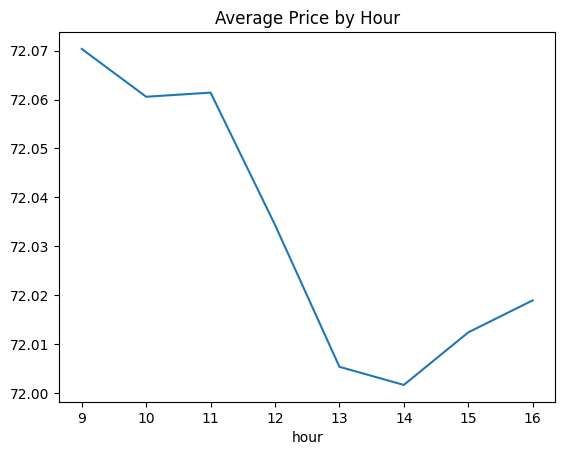

In [11]:
df['hour'] = df.index.hour
df.groupby('hour')['close'].mean().plot(title='Average Price by Hour')


<Axes: title={'center': 'Average Price by Minute'}, xlabel='minute'>

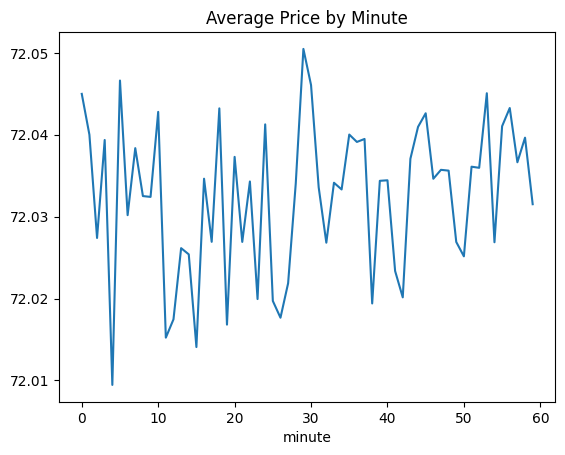

In [12]:
df['minute'] = df.index.minute

df.groupby('minute')['close'].mean().plot(title='Average Price by Minute')

<Axes: title={'center': 'Average Volume by Hour'}, xlabel='hour'>

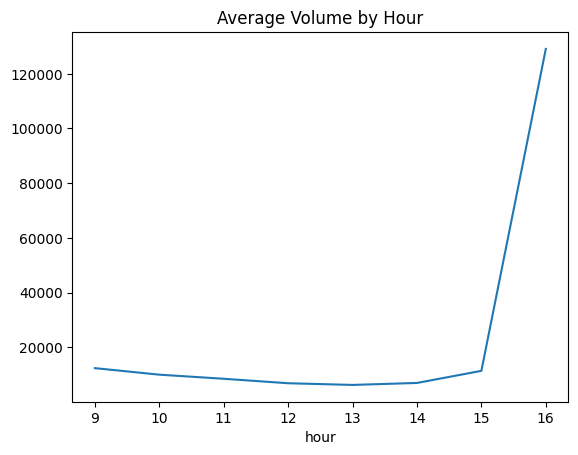

In [13]:
df.groupby('hour')['volume'].mean().plot(title='Average Volume by Hour')

the above plot indicates that there is a big ramp up of orders USO shares traded close to closing. increasing volatility

<Axes: title={'center': 'Volatility by Hour'}, xlabel='hour'>

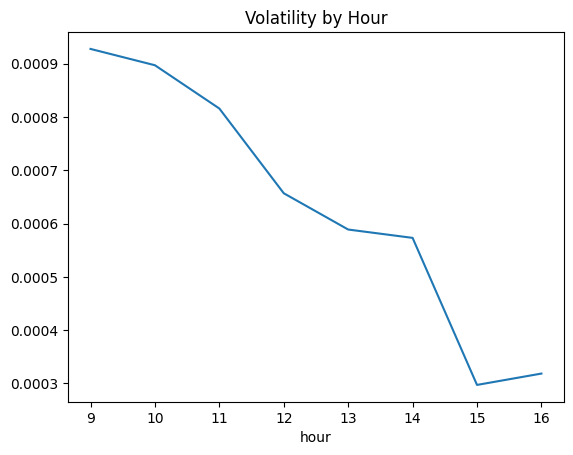

In [14]:
df.groupby('hour')['return'].std().plot(title='Volatility by Hour')

here we see an uptick in vol right before close. volume saw a large uptick as well. could there be a strong relationship here?